<a href="https://colab.research.google.com/github/Mooo49/projects/blob/main/Titanic_Survival_Prediction_using_Machine_Learning_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


importing the data

In [4]:
data=pd.read_csv('/content/train (1).csv')

Exploring the data

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.shape

(891, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [9]:
from sklearn.impute import SimpleImputer
s=SimpleImputer(missing_values=np.nan,strategy='mean')
data['Age']=s.fit_transform(data[['Age']])
s2=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
data['Embarked']=s2.fit_transform(data[['Embarked']])

In [10]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
data=data.drop(['Cabin','Name','PassengerId','Ticket'],axis=1)

In [13]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [15]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

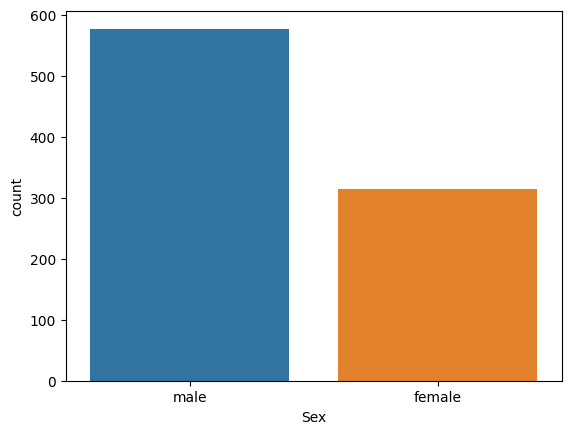

In [17]:
sns.countplot(x='Sex',data=data)
plt.show()

In [18]:
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

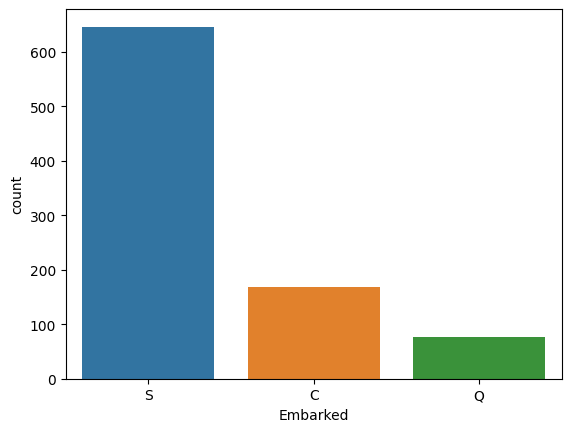

In [19]:
sns.countplot(x='Embarked',data=data)
plt.show()

In [49]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

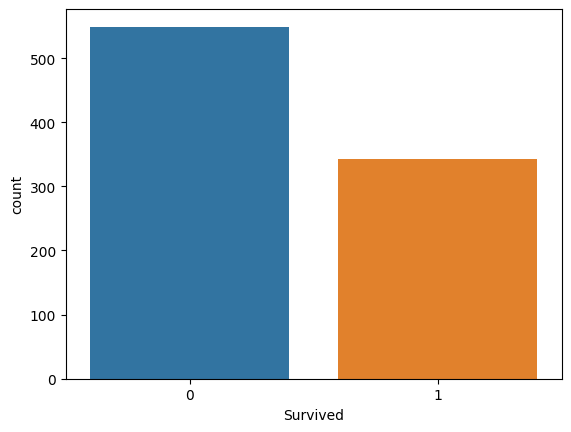

In [20]:
sns.countplot(x='Survived',data=data)

In [21]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
data['Sex']=l.fit_transform(data['Sex'])
data['Embarked']=l.fit_transform(data['Embarked'])

In [22]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [23]:

x=data.drop(['Survived'],axis=1)
y=data['Survived']
stand=StandardScaler()
x=stand.fit_transform(x)

In [16]:
x

array([[ 0.82737724,  0.73769513, -0.5924806 , ..., -0.47367361,
        -0.50244517,  0.58595414],
       [-1.56610693, -1.35557354,  0.63878901, ..., -0.47367361,
         0.78684529, -1.9423032 ],
       [ 0.82737724, -1.35557354, -0.2846632 , ..., -0.47367361,
        -0.48885426,  0.58595414],
       ...,
       [ 0.82737724, -1.35557354,  0.        , ...,  2.00893337,
        -0.17626324,  0.58595414],
       [-1.56610693,  0.73769513, -0.2846632 , ..., -0.47367361,
        -0.04438104, -1.9423032 ],
       [ 0.82737724,  0.73769513,  0.17706291, ..., -0.47367361,
        -0.49237783, -0.67817453]])

In [24]:
xtr,xts,ytr,yts=train_test_split(x,y,train_size=.9,random_state=2)
print(x.shape,xtr.shape,xts.shape)

(891, 7) (801, 7) (90, 7)


In [25]:
from sklearn.ensemble import RandomForestClassifier
m=RandomForestClassifier(max_depth=20,random_state=2)
m.fit(xtr,ytr)
print(m.score(xtr,ytr))
print(m.score(xts,yts))

0.9812734082397003
0.8222222222222222


Model evaluation


In [26]:
from sklearn.metrics import accuracy_score
#train data
x_tr_per=m.predict(xtr)
print(accuracy_score(ytr,x_tr_per))

0.9812734082397003


In [27]:
#test data
x_ts_per=m.predict(xts)
print(accuracy_score(yts,x_ts_per))

0.8222222222222222


In [28]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(yts,x_ts_per))

0.17777777777777778


<ipython-input-29-2f0679f0d00f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1=sns.distplot(yts,hist=False,color='red',label='actual values')
<ipython-input-29-2f0679f0d00f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_ts_per,hist=False,color='blue',label='predicted values',ax=a

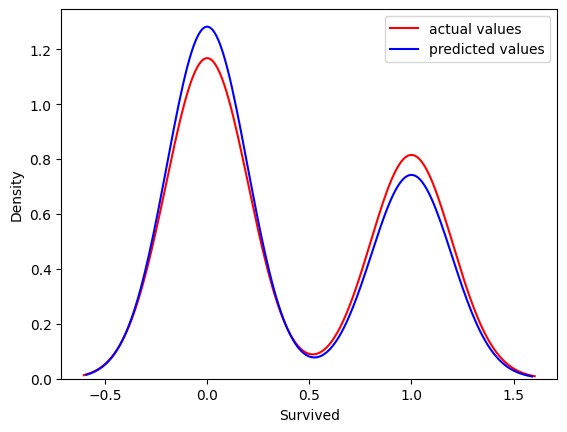

In [29]:
ax1=sns.distplot(yts,hist=False,color='red',label='actual values')
sns.distplot(x_ts_per,hist=False,color='blue',label='predicted values',ax=ax1)

plt.legend()
plt.show()

In [52]:
test=pd.read_csv('/content/test.csv')

In [53]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [54]:
test['Age']=s.fit_transform(test[['Age']])
test['Embarked']=s2.fit_transform(test[['Embarked']])
test=test.drop(['Cabin','Name','PassengerId','Ticket'],axis=1)
test['Sex']=l.fit_transform(test['Sex'])
test['Embarked']=l.fit_transform(test['Embarked'])
test=stand.fit_transform(test)

In [48]:
test


array([[ 0.87348191,  0.75592895,  0.3349926 , ..., -0.4002477 ,
        -0.49781052, -0.47091535],
       [ 0.87348191, -1.32287566,  1.32553003, ..., -0.4002477 ,
        -0.51265996,  0.70076689],
       [-0.31581919,  0.75592895,  2.51417495, ..., -0.4002477 ,
        -0.46453181, -0.47091535],
       ...,
       [ 0.87348191,  0.75592895,  0.65196458, ..., -0.4002477 ,
        -0.50818292,  0.70076689],
       [ 0.87348191,  0.75592895,  0.        , ..., -0.4002477 ,
        -0.4938564 ,  0.70076689],
       [ 0.87348191,  0.75592895,  0.        , ...,  0.61989583,
        -0.23762123, -1.64259759]])

In [55]:
test=pd.DataFrame(test,columns=['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked'])

In [56]:
test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.873482,0.755929,0.334993,-0.499470,-0.400248,-0.497811,-0.470915
1,0.873482,-1.322876,1.325530,0.616992,-0.400248,-0.512660,0.700767
2,-0.315819,0.755929,2.514175,-0.499470,-0.400248,-0.464532,-0.470915
3,0.873482,0.755929,-0.259330,-0.499470,-0.400248,-0.482888,0.700767
4,0.873482,-1.322876,-0.655545,0.616992,0.619896,-0.417971,0.700767
...,...,...,...,...,...,...,...
413,0.873482,0.755929,0.000000,-0.499470,-0.400248,-0.493856,0.700767
414,-1.505120,-1.322876,0.691586,-0.499470,-0.400248,1.312180,-1.642598
415,0.873482,0.755929,0.651965,-0.499470,-0.400248,-0.508183,0.700767
416,0.873482,0.755929,0.000000,-0.499470,-0.400248,-0.493856,0.700767


In [57]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [59]:
test=test.dropna()

In [60]:
test.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [65]:
y_test=m.predict(test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [62]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,

In [63]:
y_test = pd.DataFrame(y_test)

# Concatenate the DataFrame with the array DataFrame along axis=1
result = pd.concat([test, y_test], axis=1)


In [64]:
result.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,0
0,0.873482,0.755929,0.334993,-0.499470,-0.400248,-0.497811,-0.470915,0.0
1,0.873482,-1.322876,1.325530,0.616992,-0.400248,-0.512660,0.700767,0.0
2,-0.315819,0.755929,2.514175,-0.499470,-0.400248,-0.464532,-0.470915,0.0
3,0.873482,0.755929,-0.259330,-0.499470,-0.400248,-0.482888,0.700767,0.0
4,0.873482,-1.322876,-0.655545,0.616992,0.619896,-0.417971,0.700767,0.0
